In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
plt.rcParams["figure.figsize"] = (14, 8)

import warnings
warnings.filterwarnings("ignore") 

## READ AND CHECK THE DATA 

In [6]:
df = pd.read_csv('co2.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [12]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


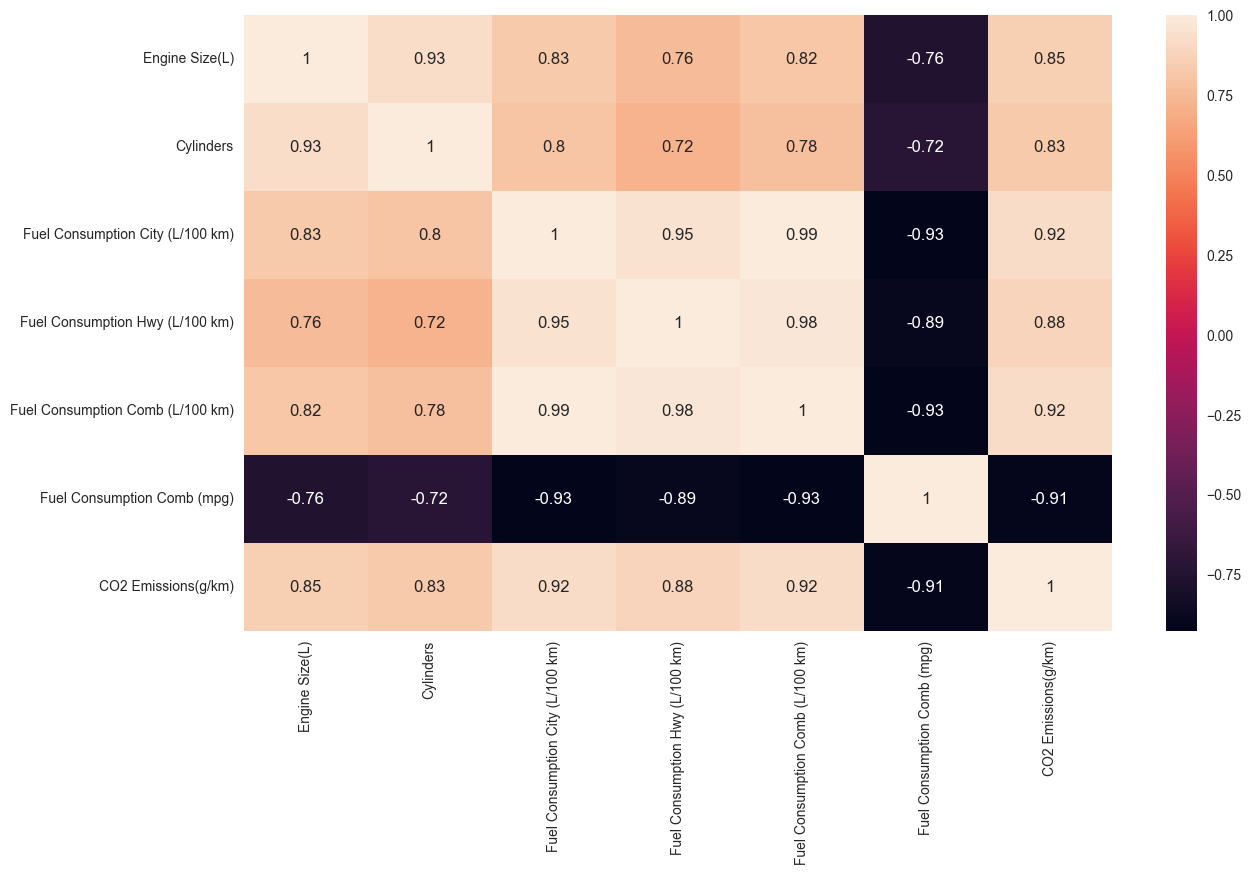

In [14]:
sns.heatmap(df.corr(), annot=True);

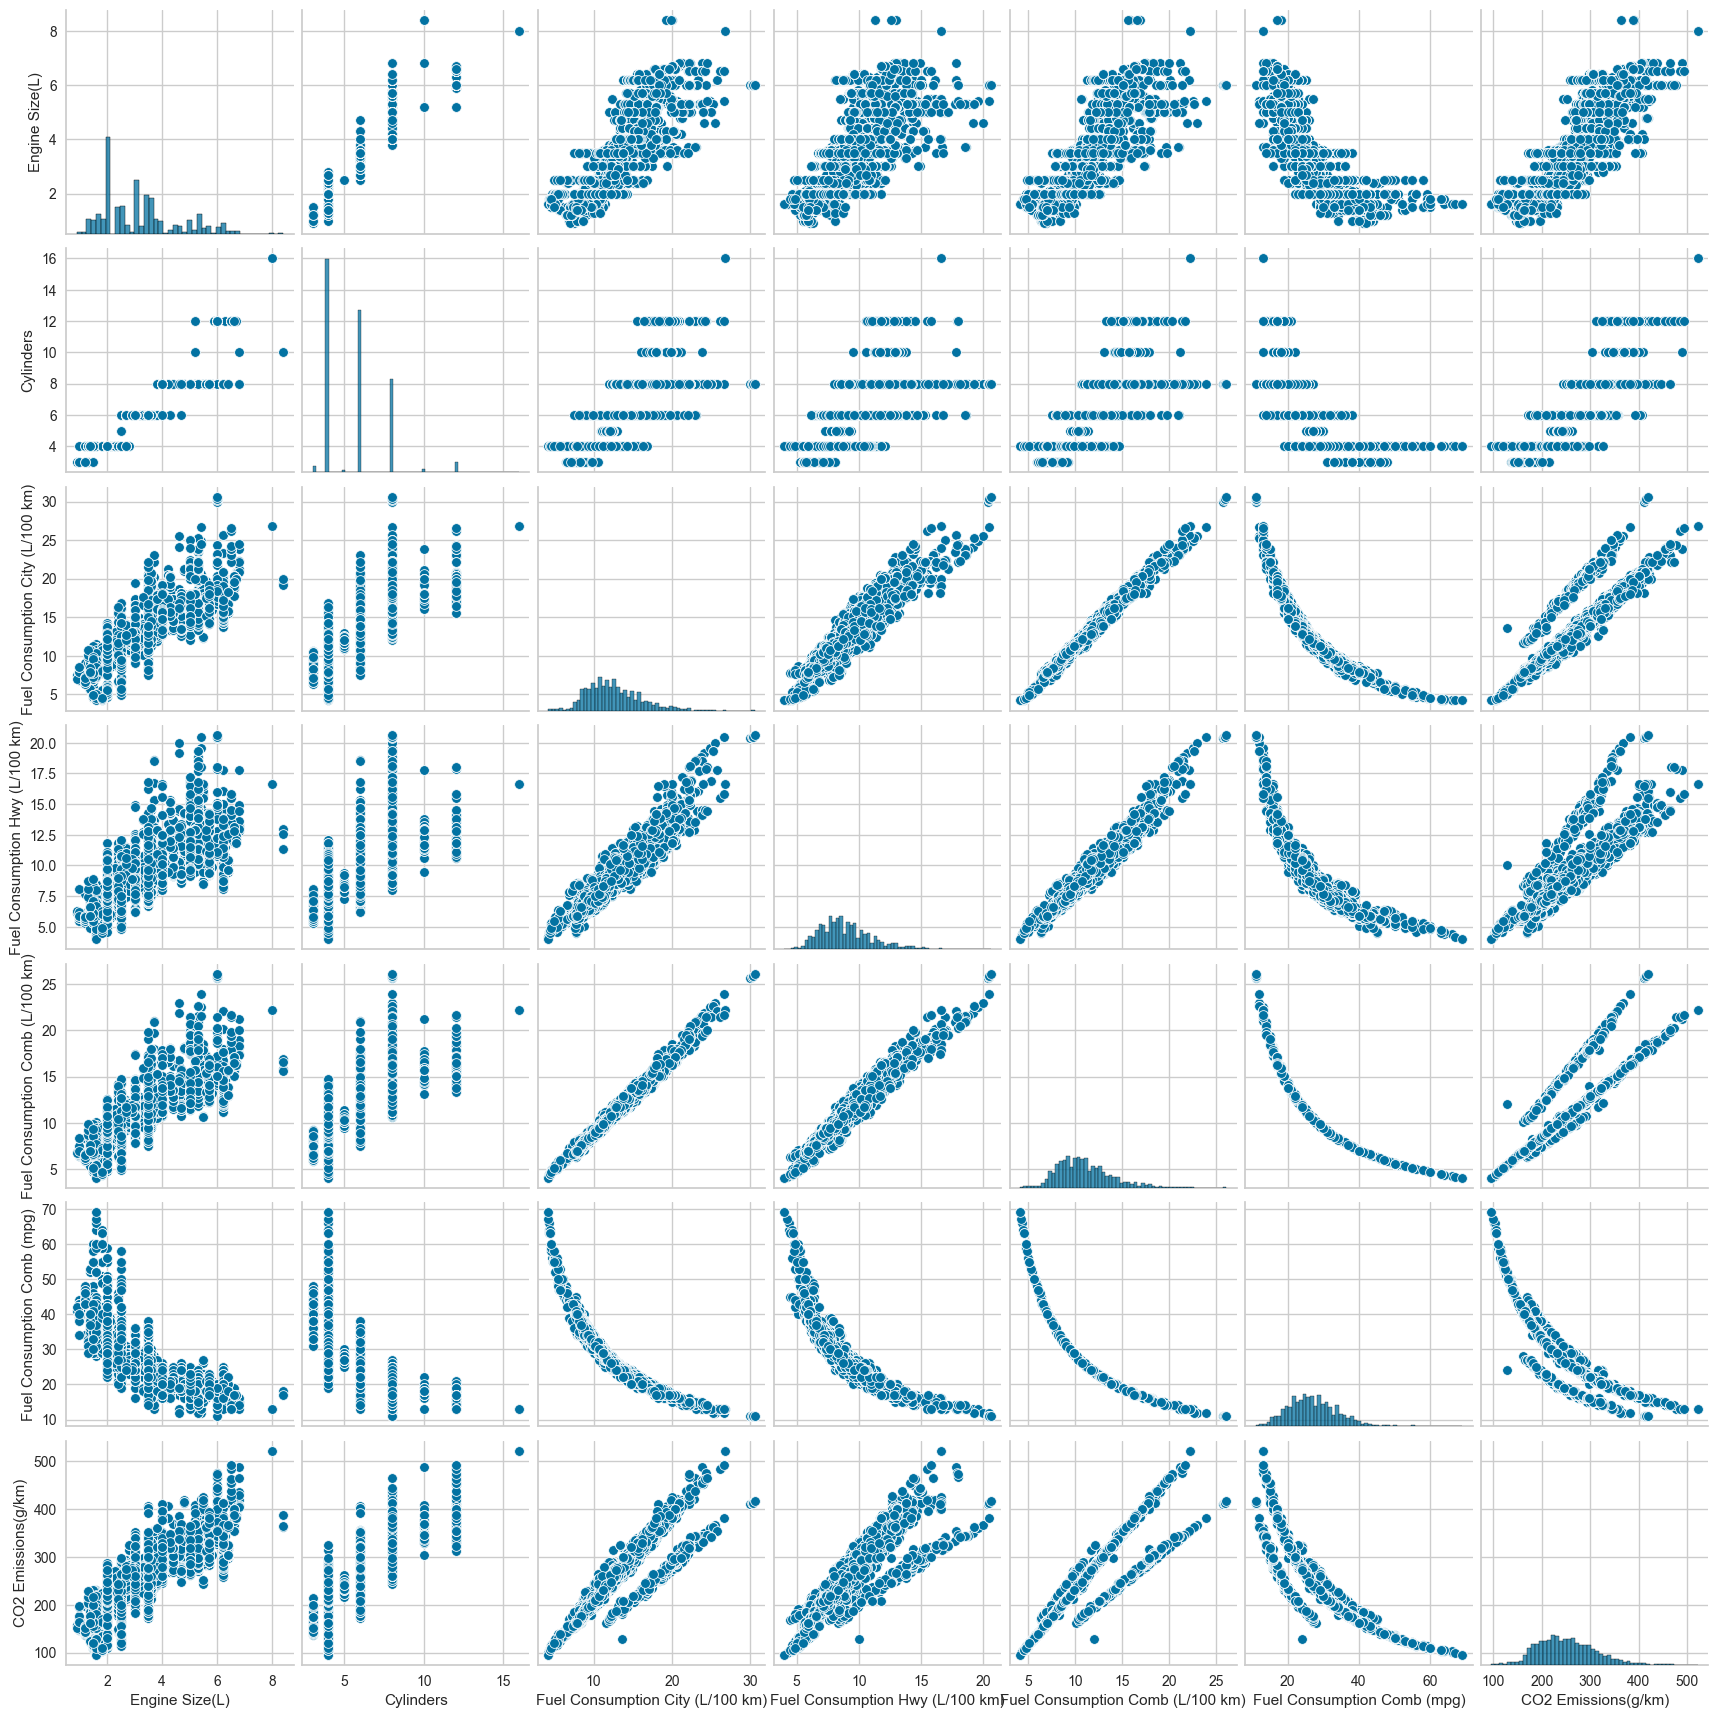

In [26]:
sns.pairplot(df);

# SIMPLE LINEAR REGRESSION

### CORRELATION BETWEEN TARGET AND THE FEATURE

In [28]:
corr =df['CO2 Emissions(g/km)'].corr(df['Engine Size(L)'])
corr

0.8511446437900011

In [29]:
r2_score = corr**2
r2_score

0.7244472046524079

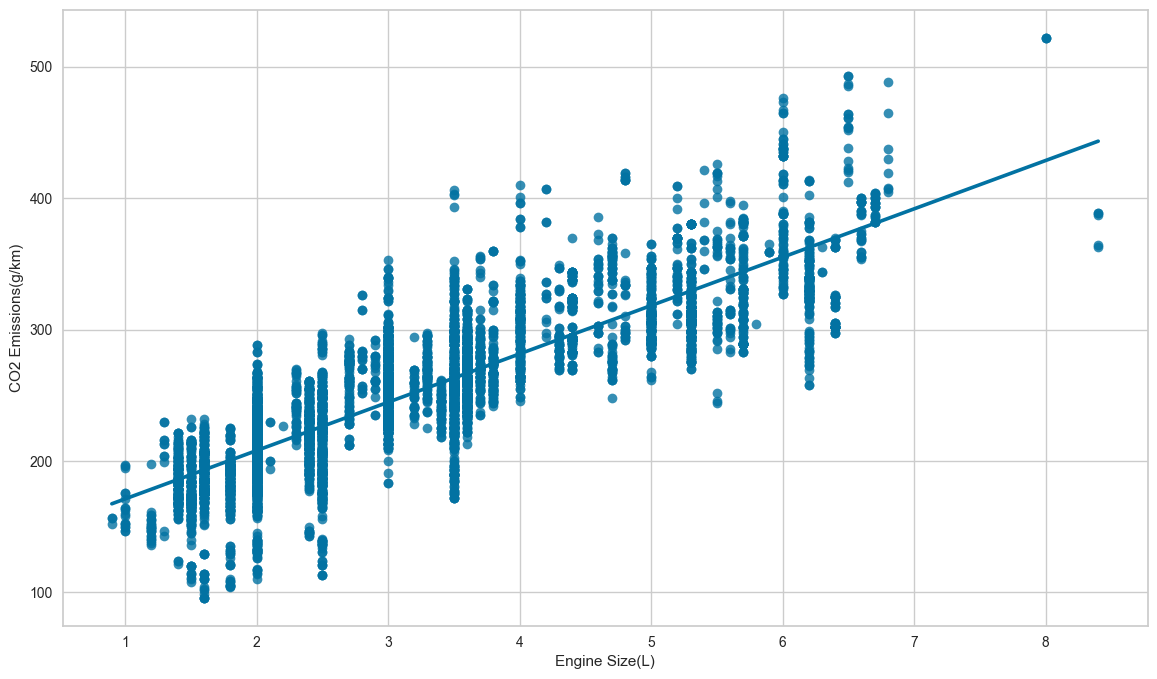

In [30]:
sns.regplot(x="Engine Size(L)", y ="CO2 Emissions(g/km)", data=df, ci = None);

### SPLITTING THE DATA

In [31]:
X = df["Engine Size(L)"]
y = df["CO2 Emissions(g/km)"]

In [32]:
np.polyfit(X, y, deg =1 )

array([ 36.77731519, 134.36589272])

### DETERMINATION OF COEFFICENTS (SLOPES AND INTERCEPT)

In [34]:
slope, intercept = np.polyfit(X, y, deg =1)
print("slope        :", slope)
print("intercept    :", intercept)

slope        : 36.77731518642009
intercept    : 134.36589272349337


In [35]:
b1, b0 = np.polyfit(X, y, deg =1)

In [36]:
y_pred = b1 * X + b0 
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine Size(L), Length: 7385, dtype: float64

In [41]:
df['CO2 Emissions(g/km)']

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [42]:
values = {"actual" : y, "predicted": y_pred, "residual": y-y_pred, "LSE": (y-y_pred)**2}
df_2 = pd.DataFrame(values)

In [43]:
df_2

,actual,predicted,residual,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


In [44]:
df_2.LSE.sum()

6966208.685372684

### PREDICTION WITH SINGLE LINEAR REGRESSION

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [50]:
potential_engine_size = np.linspace(start=0.9 , stop=8.4,num = 100)
potential_engine_size

array([0.9       , 0.97575758, 1.05151515, 1.12727273, 1.2030303 ,
       1.27878788, 1.35454545, 1.43030303, 1.50606061, 1.58181818,
       1.65757576, 1.73333333, 1.80909091, 1.88484848, 1.96060606,
       2.03636364, 2.11212121, 2.18787879, 2.26363636, 2.33939394,
       2.41515152, 2.49090909, 2.56666667, 2.64242424, 2.71818182,
       2.79393939, 2.86969697, 2.94545455, 3.02121212, 3.0969697 ,
       3.17272727, 3.24848485, 3.32424242, 3.4       , 3.47575758,
       3.55151515, 3.62727273, 3.7030303 , 3.77878788, 3.85454545,
       3.93030303, 4.00606061, 4.08181818, 4.15757576, 4.23333333,
       4.30909091, 4.38484848, 4.46060606, 4.53636364, 4.61212121,
       4.68787879, 4.76363636, 4.83939394, 4.91515152, 4.99090909,
       5.06666667, 5.14242424, 5.21818182, 5.29393939, 5.36969697,
       5.44545455, 5.52121212, 5.5969697 , 5.67272727, 5.74848485,
       5.82424242, 5.9       , 5.97575758, 6.05151515, 6.12727273,
       6.2030303 , 6.27878788, 6.35454545, 6.43030303, 6.50606

In [51]:
y_pred2 =b1*potential_engine_size +b0
y_pred2

array([167.46547639, 170.25163663, 173.03779687, 175.82395712,
       178.61011736, 181.3962776 , 184.18243784, 186.96859808,
       189.75475832, 192.54091856, 195.32707881, 198.11323905,
       200.89939929, 203.68555953, 206.47171977, 209.25788001,
       212.04404025, 214.83020049, 217.61636074, 220.40252098,
       223.18868122, 225.97484146, 228.7610017 , 231.54716194,
       234.33332218, 237.11948243, 239.90564267, 242.69180291,
       245.47796315, 248.26412339, 251.05028363, 253.83644387,
       256.62260412, 259.40876436, 262.1949246 , 264.98108484,
       267.76724508, 270.55340532, 273.33956556, 276.12572581,
       278.91188605, 281.69804629, 284.48420653, 287.27036677,
       290.05652701, 292.84268725, 295.6288475 , 298.41500774,
       301.20116798, 303.98732822, 306.77348846, 309.5596487 ,
       312.34580894, 315.13196919, 317.91812943, 320.70428967,
       323.49044991, 326.27661015, 329.06277039, 331.84893063,
       334.63509087, 337.42125112, 340.20741136, 342.99

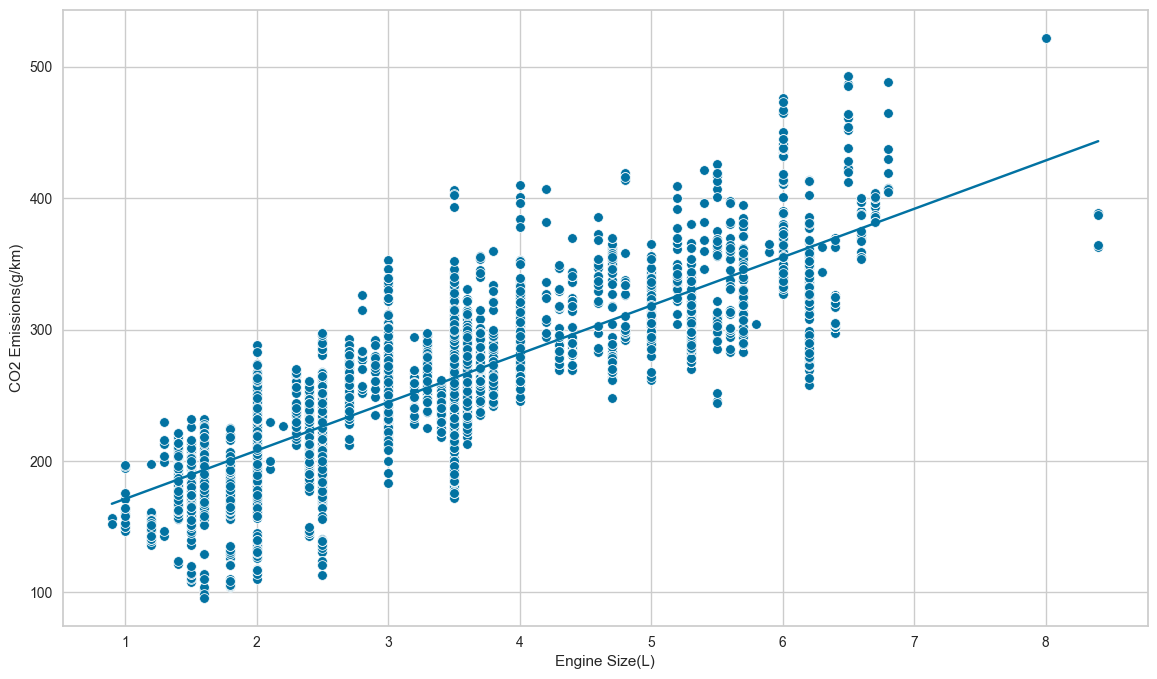

In [52]:
plt.plot(potential_engine_size, y_pred2)
sns.scatterplot( x = "Engine Size(L)", y = "CO2 Emissions(g/km)", data =df);

### MULTIPLE LINEAR REGRESSION

In [59]:
df = df[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


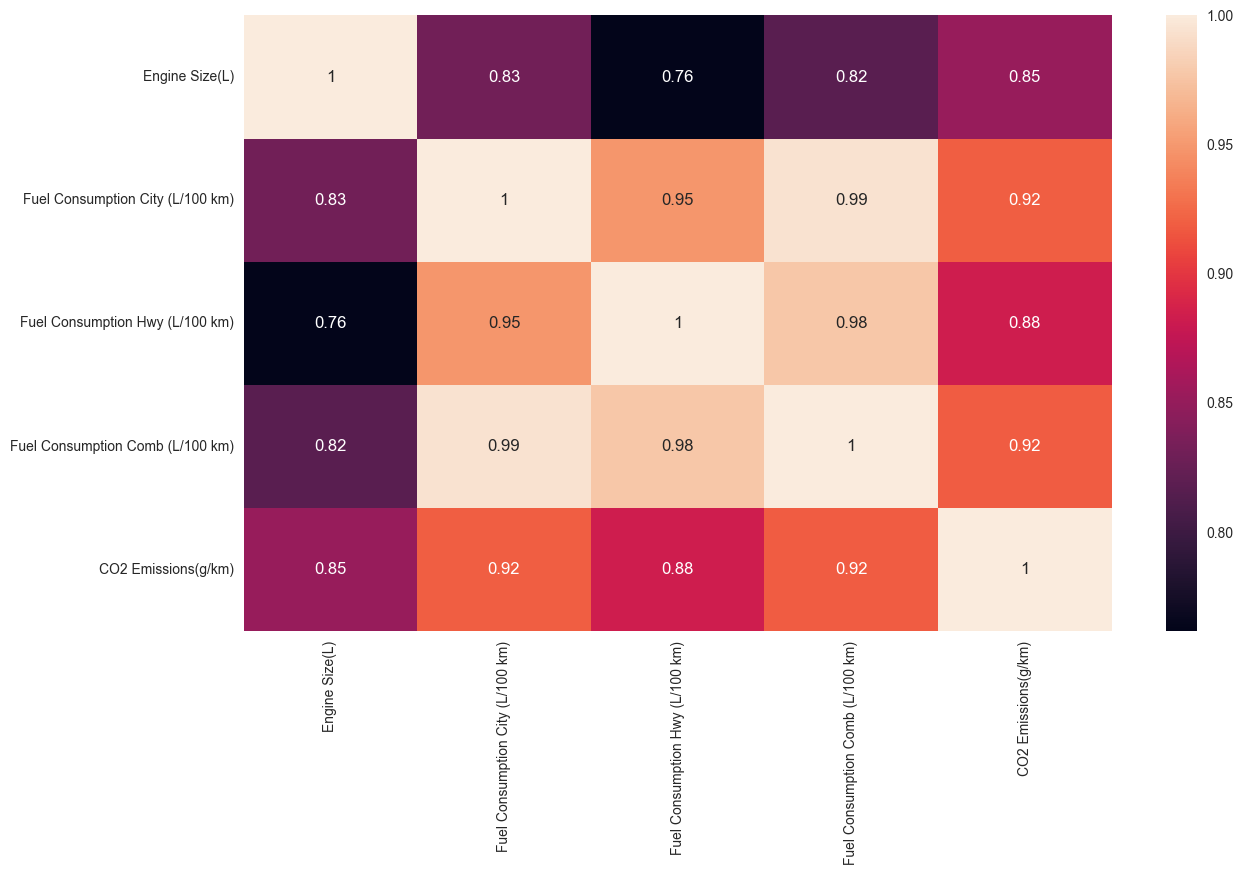

In [62]:
sns.heatmap(df.corr(), annot = True);

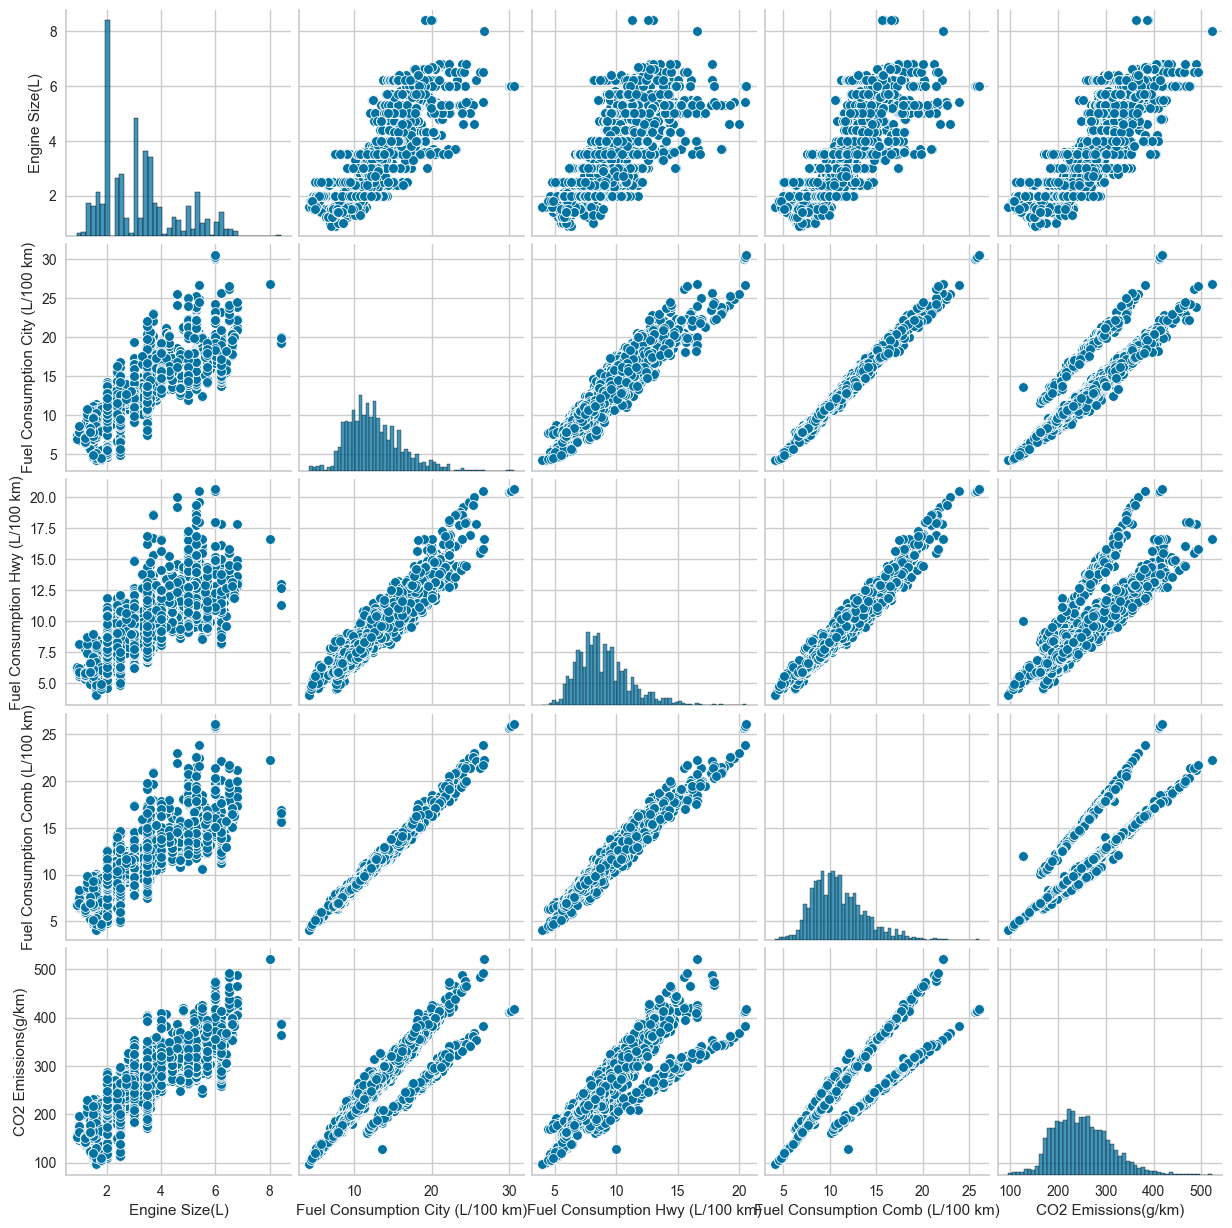

In [64]:
sns.pairplot(data=df);

In [66]:
df.corr()

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.831379,0.761526,0.817060,0.851145
Fuel Consumption City (L/100 km),0.831379,1.000000,0.948180,0.993810,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.948180,1.000000,0.977299,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.993810,0.977299,1.000000,0.918052
CO2 Emissions(g/km),0.851145,0.919592,0.883536,0.918052,1.000000


### TRAIN TEST SPLIT THE DATA

In [67]:
X = df.drop(columns="CO2 Emissions(g/km)")

y = df["CO2 Emissions(g/km)"]

print (X, y)

      Engine Size(L)  Fuel Consumption City (L/100 km)  \
0                2.0                               9.9   
1                2.4                              11.2   
2                1.5                               6.0   
3                3.5                              12.7   
4                3.5                              12.1   
...              ...                               ...   
7380             2.0                              10.7   
7381             2.0                              11.2   
7382             2.0                              11.7   
7383             2.0                              11.2   
7384             2.0                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
0                                 6.7                               8.5  
1                                 7.7                               9.6  
2                                 5.8                               5.9  
3      

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [73]:
print("Train features shape: ", X_train.shape)
print("Train target shape: ", y_train.shape)
print("Test features shape: ", X_test.shape)
print("Test target shape: ", y_test.shape)

Train features shape:  (5169, 4)
Train target shape:  (5169,)
Test features shape:  (2216, 4)
Test target shape:  (2216,)


### FITING THE MODEL

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)
y_pred

array([247.49314135, 318.24250605, 330.531149  , ..., 203.35582624,
       217.08713403, 322.16751909])

In [76]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [77]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
7261,253,247.493141,5.506859
4489,344,318.242506,25.757494
1539,322,330.531149,-8.531149
3532,297,301.388352,-4.388352
6418,308,289.971685,18.028315
...,...,...,...
5123,313,293.635087,19.364913
5359,193,205.449620,-12.449620
7294,200,203.355826,-3.355826
2569,224,217.087134,6.912866


In [78]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
7261,253,247.493141,5.506859
4489,344,318.242506,25.757494
1539,322,330.531149,-8.531149
3532,297,301.388352,-4.388352
6418,308,289.971685,18.028315
3703,406,342.960412,63.039588
5976,242,240.829298,1.170702
4332,216,212.685207,3.314793
5015,246,233.551606,12.448394
2087,223,224.824529,-1.824529


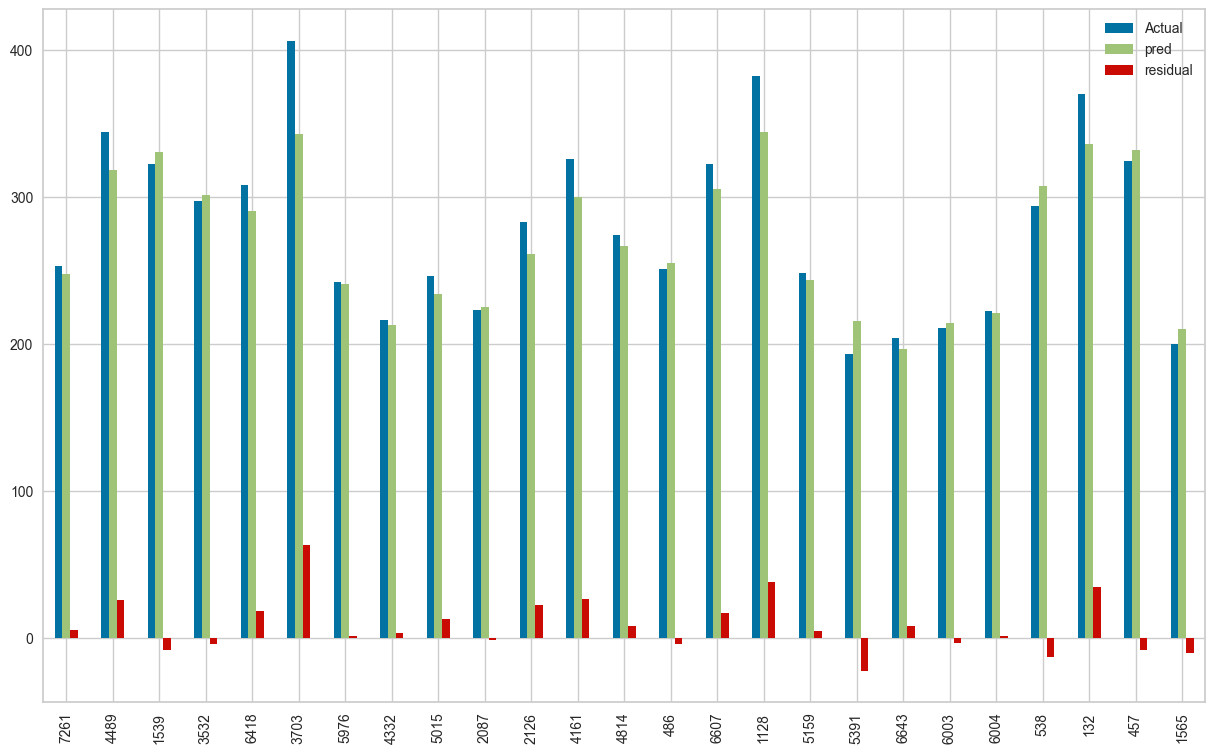

In [79]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

## ERROR METRICS

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [90]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [91]:
y_train_predict = model.predict(X_train)

In [94]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8696343237869403
MAE 		: 13.480594300830525
MSE 		: 440.3368664459096
RMSE 		: 20.98420516593158


In [95]:
eval_metric(y_train, y_train_predict)

Model testing performance: 
---------------------------
R2_score 	: 0.8753401034629793
MAE 		: 13.398753941235896
MSE 		: 429.0443041489846
RMSE 		: 20.713384661831213


### RETRANING ON FULL DATA

In [96]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

### PREDICTING NEW DATA

In [100]:
final_model.coef_

array([12.83782801,  2.97503146,  0.83187809,  9.4575278 ])

In [101]:
new_data = [[2.2, 9.5, 7.5, 8.5]]

In [102]:
final_model.predict(new_data)

array([204.47566608])